In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator

Q3.2A

In [2]:
NIR_data = pd.read_excel('sawdust_train.xlsx')
NIR_data.head()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35


In [3]:
NIR_spectra = NIR_data.iloc[:, 2:1203]
NIR_spectra['OBSNAM'] = NIR_data['OBSNAM']

In [4]:
NIR_spectra.set_index('OBSNAM', inplace = True)

<AxesSubplot:title={'center':'Training set raw NIR data'}, xlabel='Wavelength', ylabel='Signal'>

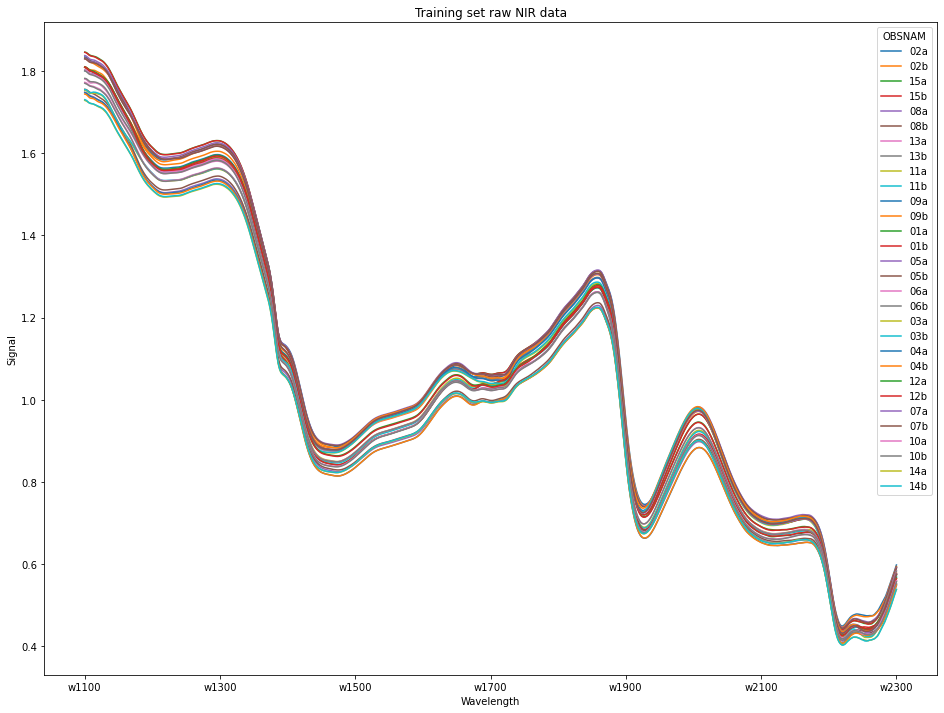

In [5]:
NIR_spectra.transpose().plot(figsize=(16,12),
                             title='Training set raw NIR data',
                             xlabel='Wavelength',
                             ylabel='Signal')

## 3.2 B. Pre-process the NIR data and perform PCA for 5 components.

In [35]:
scaler = StandardScaler(with_std=False)

In [36]:
NIR_spectra_scaled = scaler.fit_transform(NIR_spectra)

In [37]:
NIR_spectra_scaled

array([[ 0.04057267,  0.040718  ,  0.04074367, ...,  0.02684677,
         0.02725577,  0.02789977],
       [ 0.03605267,  0.036208  ,  0.03626367, ...,  0.02422277,
         0.02412677,  0.02434477],
       [ 0.05215267,  0.052248  ,  0.05246367, ...,  0.02147877,
         0.02185077,  0.02229377],
       ...,
       [-0.02362733, -0.023852  , -0.02383633, ..., -0.01323423,
        -0.01287223, -0.01283723],
       [-0.06532733, -0.065562  , -0.06553633, ..., -0.03093823,
        -0.03125823, -0.03187423],
       [-0.06357733, -0.063732  , -0.06377633, ..., -0.03092723,
        -0.03087323, -0.03124523]])

In [38]:
pca = PCA(n_components=5, svd_solver="full")
pca_scores = pca.fit_transform(NIR_spectra_scaled)
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = NIR_spectra.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
OBSNAM,,,,,
02a,-1.078295,-0.047001,0.251280,0.024857,0.003036
02b,-0.929153,-0.060230,0.245587,0.000213,-0.003432
15a,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
15b,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
08a,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
08b,-1.095564,0.004305,0.085434,-0.023682,-0.008591
13a,-0.429080,0.383454,-0.016684,0.107723,-0.004963
13b,-0.482592,0.379079,-0.008178,0.101704,-0.004043
11a,0.070632,-0.290886,-0.044821,0.048580,-0.003262


In [39]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = NIR_spectra.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


## C. Plot the cumulative explained variance versus the number of components

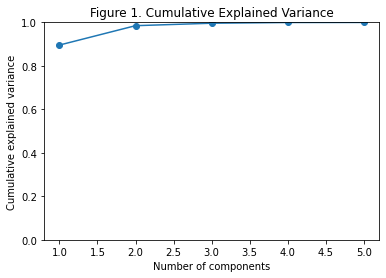

In [40]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title ('Figure 1. Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0,1)
plt.show()

In [41]:
pca_var = np.cumsum(pca.explained_variance_ratio_)
pca_var

array([0.89557845, 0.98472379, 0.996083  , 0.99941452, 0.99963969])

In [42]:
print('We need 3 components to capture 99% of the variance')

We need 3 components to capture 99% of the variance


## 3.2D Plot the PCA scores for the first two components. Comment on any outliers, trends, clusters etc (if any).

In [43]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

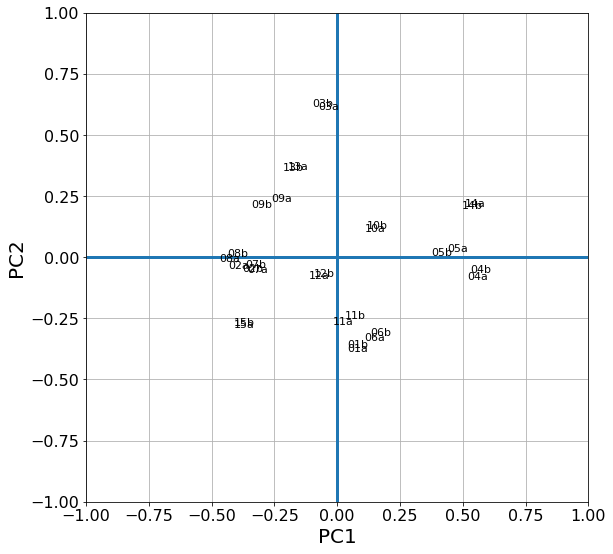

In [44]:
score_plot(pca_scores[:,:2], score_labels=scores_pd.index)
plt.show()

Samples 03 ight be outliers since they are far away from other points.
Samples 04, 05,  08, 07, 02 represent less variabilities on PC2 and samples 11, 06, 01, 03 represent less variabilities on PC1.
Depending on distances, we could treat 02,07,08 as one cluster, 01, 06, 11 as one cluster and 05, 04 14 as one cluster.

## 3.2E Plot the loadings of the first two components and comment on which wavelengths seem to be important for different PCs

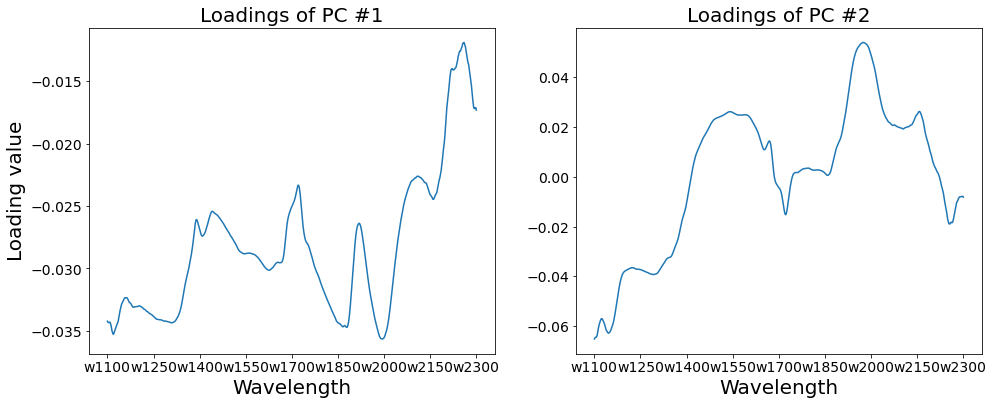

In [45]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

### The first PC captures predominantly information from the wavelengths that corresponds to w2150 to w2300.
### PC2 captures information from the wavelengths between w1400 and w2150.

## 3.2.F Apply the dimensionality reduction with the PCA model you developed in step B for the test set using the transform method.

In [56]:
NIR_test = pd.DataFrame(pd.read_excel('sawdust_pred.xlsx'))
NIR_test.head()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,3,27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,...,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
1,4,27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,...,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
2,7,25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,...,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
3,8,25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,...,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
4,13,17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,...,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25


In [57]:
test_spectra = NIR_test.iloc[:, 2:1203]
test_spectra['OBSNAM'] = NIR_test['OBSNAM']
test_spectra.set_index('OBSNAM', inplace = True)

In [58]:
test_spectra_scaled = scaler.fit_transform(test_spectra)
pca_scores_test = pca.fit_transform(test_spectra_scaled)
scores_pd_test = pd.DataFrame(data = pca_scores_test
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = test_spectra.index)
loadings_pd_test = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                           ,index = test_spectra.columns)

In [59]:
scores_pd_test

,PC1,PC2,PC3,PC4,PC5
OBSNAM,,,,,
27a,1.307167,-0.116739,0.019663,-0.011489,0.042792
27b,1.295767,-0.082817,0.045996,-0.019569,0.049907
25a,0.045929,0.312981,-0.075174,-0.024855,0.019280
25b,-0.100166,0.282512,-0.080612,-0.021303,0.026089
17a,-0.238445,0.106215,0.067848,-0.000860,0.029368
17b,-0.347892,0.062116,0.054608,0.004865,0.034243
20a,0.777212,0.081381,-0.034592,-0.012591,-0.022065
20b,0.846563,0.051527,-0.048657,-0.006842,-0.026525
26a,-0.059730,0.124504,0.088213,0.051086,-0.013622


In [60]:
loadings_pd_test 

,PC1,PC2,PC3,PC4,PC5
w1100,0.036745,0.054166,0.039793,-0.000688,-0.009502
w1101,0.036743,0.054370,0.039220,-0.001193,-0.008820
w1102,0.036739,0.054342,0.038570,-0.001731,-0.008647
w1103,0.036761,0.054258,0.038005,-0.002057,-0.008098
w1104,0.036822,0.054027,0.037770,-0.002298,-0.007187
...,...,...,...,...,...
w2296,0.018198,0.033278,-0.069209,0.032679,0.081565
w2297,0.018311,0.033154,-0.072118,0.029609,0.075845
w2298,0.018468,0.032889,-0.074372,0.026279,0.070583
w2299,0.018678,0.032797,-0.076770,0.024036,0.068503


## 3.2GCreate a scatter plot of the scores in PC1, PC2 of all 54 points in the train and testdata set, coloured by the set they belong to (suggestion: use sns.scatterplot). 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

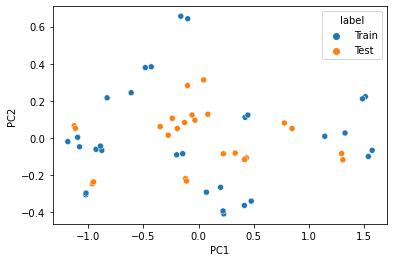

In [61]:
scores_pd['label'] = 'Train'
scores_pd_test['label'] = 'Test'
scores_table = pd.concat([scores_pd, scores_pd_test],axis = 0)
sns.scatterplot(data=scores_table, x="PC1", y="PC2", hue="label")

It is important to overlap the scores of both train and test set in one graph to check the overall distribution of the data. By observation, we could conclude that most of the test data is around the center and training set is more spread out. We would need more data to train the model to adjust it.

## A.Run the PLS regression to model all 3 outputs with the scaled train set spectra. Increase the number of components to achieve R2 value of at least 0.92 (use PLSRegression’s method score to estimate R2)

In [62]:
X_train = NIR_spectra_scaled
y_train = NIR_data.loc[:, ['Spruce', 'Pine', 'Birch']]

In [63]:
y_train['OBSNAM'] = NIR_data['OBSNAM']
y_train.set_index('OBSNAM', inplace = True)

In [64]:
pls_sklearn = PLSRegression(n_components=3, scale=False)
pls_sklearn.fit(X_train, y_train)
pls_sklearn.score(X_train,y_train)

0.9240392024759805

## B. Predict the output values for the inputs in the test set and compare them by plotting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch,respectively). Also, include the y=x line for reference.

In [65]:
X_test = test_spectra_scaled
y_test = NIR_test.loc[:, ['Spruce', 'Pine', 'Birch']]
y_test['OBSNAM'] = NIR_test['OBSNAM']
y_test.set_index('OBSNAM', inplace=True)

(0.0, 100.0)

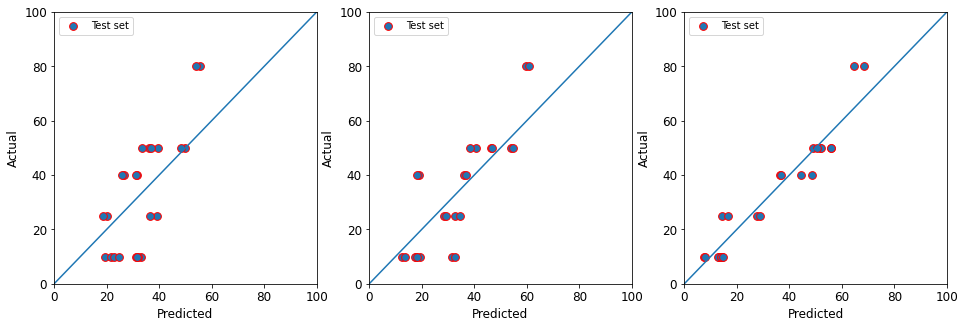

In [66]:
y_test_predicted = pls_sklearn.predict(X_test)

fig2 = plt.figure(figsize=(16, 5))
sub5 = fig2.add_subplot(131)
plt.scatter(y_test_predicted[:, 0], y_test['Spruce'], s=60, marker="o", edgecolors='r')
plt.legend(['Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])

sub5 = fig2.add_subplot(132)
plt.scatter(y_test_predicted[:, 1], y_test['Pine'], s=60, marker="o", edgecolors='r')
plt.legend(['Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])

sub5 = fig2.add_subplot(133)
plt.scatter(y_test_predicted[:, 2], y_test['Birch'], s=60, marker="o", edgecolors='r')
plt.legend(['Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.tick_params(labelsize=12)
plt.xlim([0, 100])
plt.ylim([0, 100])